In [15]:
import pandas as pd

file_name = "../../data/prima-indians-diabetes.csv"
names = ['Preg', 'Plas', 'Pres', 'Skin',
         'Test', 'Mass', 'Pedi', 'Age', 'Class']
df = pd.read_csv(file_name, names=names)
array_df = df.values
x = array_df[:, :8]
y = array_df[:, 8]


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

test_size = .33
seed = 1

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size, random_state=seed)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
matrix

array([[147,  15],
       [ 42,  50]], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score

test_size = .33
seed = 1

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size, random_state=seed)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
cohen_score = cohen_kappa_score(y_test, predicted)
cohen_score



0.48140984311197077

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
scoring = 'roc_auc'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(f"AUC: {results.mean()}% {results.std()}")

AUC: 0.8294519275727007% 0.046996783036400036


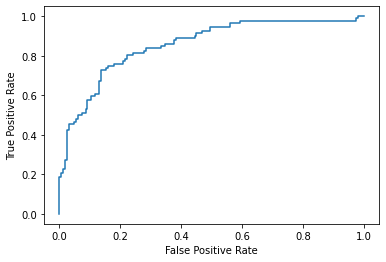

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

seed = 1
test_size=.33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
y_score = model.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_display=RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
